### Jose Luis Ropero Lozano
### Jose Luis Rueda Mayorga 

# Regresion Lineal y Descenso del Gradiente

El objetivo es:

*   Implementar grid search, gradient descent y stochastic gradient descent
*   Aprender a visualizer tus resultados
*   Identificar ventajas y desventajas de estos algortimos
*   Analizar el efecto de MSE      
  

$\textbf{A}$) ¿Qué representa cada columna de $\tilde{X}$ ̃?
- La primera columna representa un vector de unos 
- La segunda columna representa los datos de altura

$\textbf{B}$)¿Qué representa cada fila de  $\tilde{X}$ ?
- Cada fila de x representa el dato 1 para realizar la operación entre matrices y el valor de las alturas de todas las muestras o datos

$\textbf{C}$) ¿Por qué tenemos unos en $\tilde{X}$ ̃?
- El objetivo de la columna de unos es que al momento de realizar la operación entre matrices no se pierda el valor de $W_{0}$ y  pueda quedar de la forma  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$F= W_{0}+ W_{1}*X_{1}$ y de esta manera se pueda representar los datos de forma vectorial. 

$\textbf{D}$) Si tenemos las alturas y pesos de 3 personas, ¿cúal sería el tamaño de $\textbf{y}$ y $\tilde{X}$ ? ¿Qué
representaría   $\tilde{X}_{32}$ ?
- Y = 212.74
- X = 74.11
- Este dato representaría la altura de la tercera persona 

$\textbf{E}$) En lib.py, se ha proporcionado código para formar arrays para $\textbf{y}$ y $\tilde{X}$. Revisa el código y
asegúrate de entender cómo están construidos.
- En lin.py inicial mente contamos en la importacion de la librería numpy para operaciones matemáticas y listas
- posteriormente se crean 3 funciones:
    - load data: encargada de cargar los datos, ordenarlos y convertirlos en las unidades adecuadas y retornar un subconjunto de 50 muestra si la sub_sample es verdadera. 
    - standarizer(X): que aplica la función de estandarización calculado la media y la desviación estándar, devolviendo así los datos estandarizados. 
    - build_model_data(height, weight): prepara los datos para poder aplicar una regresión lineal agregando una columna de unos a x de alturas.





# Data

In [90]:
from lib import *

height, weight, gender = load_data(sub_sample=False)
X, mu_X, sigma_X = standarizer(height)
y, X_ = build_model_data(X, weight)

$\textbf{F}$) Verifica si los tamaños de las variables tienen sentido (usa la función shape).
- Al verificar el tamaño de las variables con la función shape se puede llegar a la conclusión de que los datos están correctos gracias a que tienen las mismas dimensiones. 

In [91]:
y.shape, X_.shape

((10000,), (10000, 2))

# 1. Calcule la funcion costo

Complete las funciones faltantes, verifique con el ejemplo de la clase

In [92]:
import numpy as np

def loss_function(X_, y, w, option=1):
 
  """
    Args:
      X_: matrix numpy de la forma (N,2)
      y: vector numpy de la forma (N,)
      w: vector de la forma (2,)
      option: 1 for mse
              0 for mae

    Return:
      El valor de la perdida correspondiente a el parametros de entrada w
  """
  errors =np.dot(X_, w)
  n = len(y)
  if option == 0:
    loss = (1/(n))*np.sum(np.abs(y-errors))
    return loss
  elif option == 1:
    loss = (1/(2*n))*np.sum((y-errors)**2)
    return loss
  



Ahora si todo esta bien, deberiamos obtener

In [93]:
xx = np.array([[1 ,1],
                [1, 2]])
yy = np.array([1, 2])
ww = np.array([0, 1])

loss_function(xx, yy, ww, 1)


0.0

# 2. Grid Search


In [94]:
def grid_search(X_, y, grid_w0, grid_w1, option):
  """
    Este algoritmo realiza la busqueda creando una cuadricula
    Args:
      X_ : numpy de la forma = (N,2)
      y  : numpy de forma =  (N,)
      grid_w0: numpy de la forma = (num_pts_w0,) .Array 1D que contiene num_pts_w0 valores del parametro w0 a ser probados en la cuadricula
      grid_w1: numpy de la forma = (num_pts_w1,) .Array 1D que contiene num_pts_w1 valores del parametro w1 a ser probados en la cuadricula
      option: scalar value = 1 para MSE y 0 para MAE
    Return:
      losses: numpy de la forma = (num_pts_w0, num_pts_w1). Array 2D que contiene los valores de la funcion de perdidad para cada una de las
              combinaciones de w0 y w1
  """
    
  losses_grid = np.zeros((len(grid_w0), len(grid_w1)))
  for i, w0 in enumerate(grid_w0):
    for j, w1 in enumerate(grid_w1):
      w = np.array([w0, w1])
      losses_grid[i, j] = loss_function(X_, y, w, option)

  return losses_grid



Si, todo va bien podremos usarla

In [95]:
def gen_w(start, stop, n_intervals):
  """ Generamos la Grilla """
  #numpy.linspace(valor-inicial, valor-final, número de valores)
  grid_w0 = np.linspace(start[0], stop[0], n_intervals) # lista o tupla valores inciales w0 y w1 
  grid_w1 = np.linspace(start[1], stop[1], n_intervals) # lista o tupla valores finales w0 y w1
  return grid_w0, grid_w1

def get_best_param(w0, w1, losses_grid):
  """ Obtenemos los mejores w* a partir del resultados obtenidos con la función de perdida en grid search
"""
#losses_grid.argmin() encuentra el valor minimo en losses_grid el cual corresponde a la menor perdida
  min_row, min_col = np.unravel_index(losses_grid.argmin(), losses_grid.shape)
# la funcion devulve la perdida minima y los valores de pametros de w0,w1 que genereron esa perdida 
  return losses_grid[min_row, min_col], w0[min_row], w1[min_col]

In [96]:
import datetime

# Emepzamos generando la malla
start = [-100, -150]
stop = [200, 150]
n_intervals = 10

grid_w0, grid_w1 = gen_w(start, stop, n_intervals)

# iniciamos la busqueda en la malla
start_time = datetime.datetime.now()
grid_losses = grid_search(X_,y, grid_w0, grid_w1, 1)

# Escogemos la mejor combinación
loss_min, w0_best, w1_best = get_best_param(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

print(f"Grid Search: loss* = {loss_min}, w0* = {w0_best}, w1* = {w1_best}, execution time = {execution_time} seconds")

Grid Search: loss* = 42.42448314678248, w0* = 66.66666666666669, w1* = 16.666666666666686, execution time = 0.033983 seconds


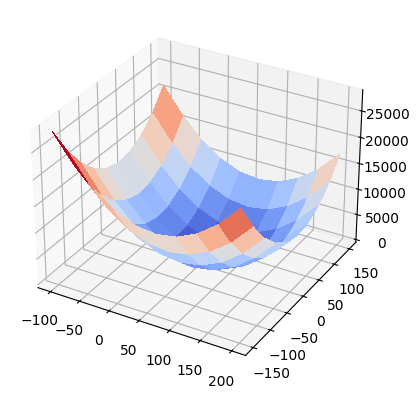

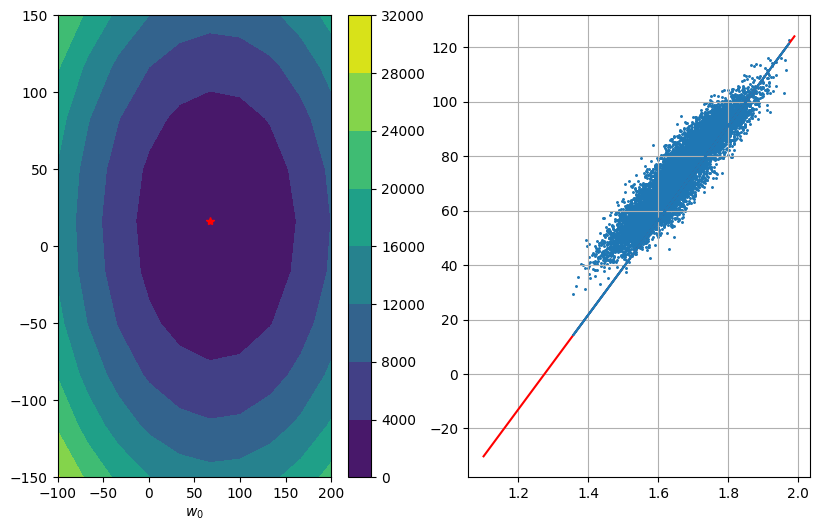

In [97]:
import matplotlib.pyplot as plt
from matplotlib import cm

def predictions(w0, w1, mu, sigma):
  """ Creemos el modelo de la regresion lineal f(x)"""
  x = np.arange(1.1, 2, 0.01)
  x_normalized = (x - mu)/sigma
  f = w0 + w1*x_normalized
  return x, f

# Grafiquemos los resultados 3D
w0, w1 = np.meshgrid(grid_w0, grid_w1)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(w0, w1, grid_losses, cmap=cm.coolwarm, linewidth=0, antialiased=False)

fig = plt.figure()

# plt contour
ax1 = fig.add_subplot(1,3,1)
contour = ax1.contourf(w0, w1, grid_losses.T)
fig.colorbar(contour, ax=ax1)
ax1.set_xlabel(r"$w_1$")
ax1.set_xlabel(r"$w_0$")
# ubiacion al minimo  - star
ax1.plot(w0_best, w1_best, marker = '*', color="r")

# plt model
ax2 = fig.add_subplot(1,3,2)
ax2.scatter( height, weight, marker='.', s=5)
ax2.grid()

x, f = predictions(w0_best, w1_best, mu_X, sigma_X)   # Modelos f(x) = w0 +w1*x
ax2 = fig.get_axes()[2]
ax2.plot(x, f, color='r')
ax2.plot(height, w0_best + w1_best*X)                 # Desde los datos
fig.set_size_inches(15, 6)



a) ¿Te parece una buena estimación? ¿Por qué? ¿Cuál es el problema? ¿Por qué el gráfico
MSE no es suave? Repite el ejercicio anterior cambiando el espaciado de la cuadr ́ıcula a 10
en lugar de 50. Compara el nuevo ajuste con el anterior.

$\textbf{Respuesta}$: Con un espaciado de 50 intervalos, me parece una buena estimación, el error podría ser aceptable, en este caso se acerca bastante al valor mínimo,  en cambio al tomar 10 intervalos el modelo se vuelve muy impreciso al no considerar muchos parámetros w0 y w1 donde posiblemente pueda estar el menor costo del modelo,  Se nota también que a mayor número de intervalos mayor es el tiempo de procesamiento y el costo computacional. 

In [98]:
n_intervals = 50
grid_w0, grid_w1 = gen_w(start, stop, n_intervals)

# iniciamos la busqueda en la malla
start_time = datetime.datetime.now()
grid_losses = grid_search(X_,y, grid_w0, grid_w1, 1)

# Escogemos la mejor combinación
loss_min, w0_best, w1_best = get_best_param(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

print(f"Grid Search: loss* = {loss_min}, w0* = {w0_best}, w1* = {w1_best}, execution time = {execution_time} seconds")

Grid Search: loss* = 18.79354101952324, w0* = 71.42857142857142, w1* = 15.306122448979579, execution time = 0.913578 seconds


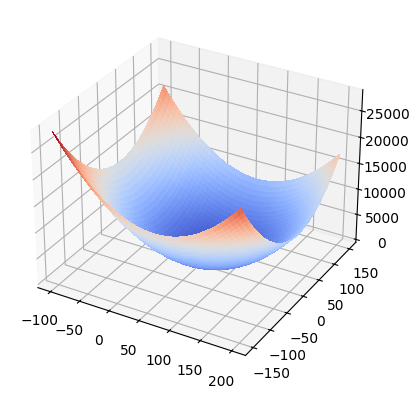

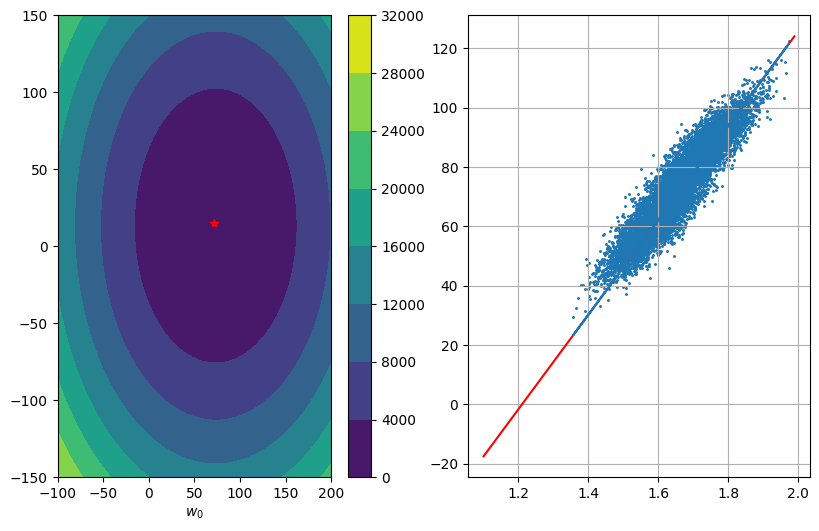

In [99]:
import matplotlib.pyplot as plt
from matplotlib import cm

def predictions(w0, w1, mu, sigma):
  """ Creemos el modelo de la regresion lineal f(x)"""
  x = np.arange(1.1, 2, 0.01)
  x_normalized = (x - mu)/sigma
  f = w0 + w1*x_normalized
  return x, f

# Grafiquemos los resultados 3D
w0, w1 = np.meshgrid(grid_w0, grid_w1)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(w0, w1, grid_losses, cmap=cm.coolwarm, linewidth=0, antialiased=False)

fig = plt.figure()

# plt contour
ax1 = fig.add_subplot(1,3,1)
contour = ax1.contourf(w0, w1, grid_losses.T)
fig.colorbar(contour, ax=ax1)
ax1.set_xlabel(r"$w_1$")
ax1.set_xlabel(r"$w_0$")
# ubiacion al minimo  - star
ax1.plot(w0_best, w1_best, marker = '*', color="r")

# plt model
ax2 = fig.add_subplot(1,3,2)
ax2.scatter( height, weight, marker='.', s=5)
ax2.grid()

x, f = predictions(w0_best, w1_best, mu_X, sigma_X)   # Modelos f(x) = w0 +w1*x
ax2 = fig.get_axes()[2]
ax2.plot(x, f, color='r')
ax2.plot(height, w0_best + w1_best*X)                 # Desde los datos
fig.set_size_inches(15, 6)



b) Discute con tus compañeros:
- Para obtener un ajuste preciso, ¿necesitas una cuadrícula gruesa o una cuadrícula fina?
    - $\textbf{Respuesta: }$ Para lograr un mejor ajuste se necesita una cuadrícula fina, de esta manera se incluyen más puntos en el mismo rango, permitiendo una mejor estimación del modelo, pero aumentado el costo computacional.

- Prueba con distintos valores de espaciado de cuadrícula. ¿Qué observas? 
    - $\textbf{Respuesta: }$ Entre más fina sea la cuadrícula, se puede observar cómo se obtiene una mejor aproximación al mínimo costo, hasta cierto punto donde ya no se logra notar dicha aproximación.  ya no sería necesario aumentar el número de intervalos para lograr una cuadrícula más fina, además gráficamente se puede notar más suave la proyección del costo.
Entre menos intervalos se tiene una peor aproximación al mínimo costo, y se observa gráficamente como el modelo pierde suavidad y se nota más escalonado. 

- ¿Cómo afecta el aumento del n ́umero de valores al coste computacional? ¿Es rápido o lento tu código?
    - $\textbf{Respuesta: }$ El número de valores en la cuadrícula  es inversamente proporcional al costo computacional, entre más fina la cuádricula mayor será el costo y viceversa, ya que se debe calcular el costo para cada combinación de w0 y w1, entonces el aumento de valores hace que el código sea más LENTO.



# 3. Gradient Descent

A) Implementa una función que calcule los gradientes. Implementa la función de cuaderno
calcular gd(X_, w, y) utilizando la ecuación (1). Comprueba que la función devuelve los
valores correctos. Primero, calcula manualmente los gradientes para valores de y, $\tilde{X}$ y w
y compárelos con la salida de gd(X_, w, y).

Formula: $$ -\frac{1}{N} \tilde{X}(y-XW)$$
Donde  $$X= \begin{bmatrix}
1 & 1 \\
 1&  2\\
\end{bmatrix}, y =\begin{bmatrix}
1 \\ 2
\end{bmatrix}, W= \begin{bmatrix}
1 \\ 1
\end{bmatrix}, N= 2$$

Reemplazamos 
$$-\frac{1}{2}\begin{bmatrix}
1 & 1 \\
 1&  2\\
\end{bmatrix}^{T} (\begin{bmatrix}
1 \\ 2
\end{bmatrix} - \begin{bmatrix}
1 & 1 \\
 1&  2\\
\end{bmatrix}\begin{bmatrix}
1 \\ 1
\end{bmatrix}) $$

Operamos 
$$-\frac{1}{2}\begin{bmatrix}
1 & 1 \\
 1&  2\\
\end{bmatrix}^{T}(\begin{bmatrix}
1 \\ 2
\end{bmatrix} - \begin{bmatrix}
2 \\3
\end{bmatrix})$$

$$-\frac{1}{2}\begin{bmatrix}
1 & 1 \\
 1&  2\\
\end{bmatrix}\begin{bmatrix}
-1 \\ -1
\end{bmatrix}$$


$$-\frac{1}{2}\begin{bmatrix}
-2 \\ -3
\end{bmatrix}$$

$$\frac{1}{2}\begin{bmatrix}
2 \\ 3
\end{bmatrix}$$

$$Gradiante =\begin{bmatrix}
1 \\ 1.5
\end{bmatrix}$$


In [100]:
def gd(X_, w, y):
    """ 
    Calculo del gradiente en w
    Args:
        X_: numpy de la forma (N, 2)
        w : numpy de la forma (2,). Vector de parámetros del modelo
        y : numpy de la forma (N,)
    Return:
        Un vector numpy de la forma (2,), que tiene el gradiente de la función de pérdida en w
    """
    n = len(y)
    errors = y - np.dot(X_, w)
    gradient = (-1/n)*np.dot(X_.T, errors)
    return gradient, errors

Si esta bien, debe darnos lo siguiente

In [101]:
xx = np.array([[1 ,1], [1, 2]])
yy = np.array([1, 2])
ww = np.array([1, 1])

gd(xx, ww, yy)

(array([1. , 1.5]), array([-1, -1]))

B) Una vez que te asegures de que tu código de gradiente es correcto, obtén alguna intuición
sobre los valores del gradiente: Calcula los gradientes para
- w0 = 100 y w1 = 20
- w0 = 50 y w1 = 10

¿Qué nos dicen los valores de estos gradientes? Por ejemplo, piensa en la norma de este
vector. ¿En qué caso son más grandes? ¿Qué significa eso?

Obs 1: Imagina una función cuadrática y estima su gradiente cerca de su mínimo y lejos de
 ́el.

Obs 2: Como sabemos de las clases, la regla de actualización para el descenso de gradiente
en el paso t es : $w^{(t+1)} = w^{t} - \gamma \bigtriangledown L(w^{t})$, donde $\gamma > 0$, y $\bigtriangledown L \epsilon R^{2}$


$\textbf{Respuesta: } $ Estos valores son los parámetros del modelo en un punto específico, el cual nos indica el gradiente, con información de la pendiente en ese punto.  Indicando hacia donde la función o el modelo crece, lo que quiere decir que   W0=100, W1=20, con módulo  235.62 está más lejana del mínimo que W0=50, W1=10, con módulo 116.35 el cual se considera más cercana a un punto mínimo debido a que se la pendiente va disminuyendo.  

In [102]:
ww = np.array([100, 20])
gd(xx, ww, yy)

(array([128.5, 197.5]), array([-119, -138]))

In [103]:
ww = np.array([50, 10])

gd(xx, ww, yy)

(array([63.5, 97.5]), array([-59, -68]))

C) Llena la función del cuaderno de descenso de gradiente {gd_algorithm(X_, y, ...)}.
Ejecuta el código y visualiza las iteraciones. Además, observa los mensajes impresos que
muestran L y los valores de $w_{0}^{(t)}$ y $w_{1}^{(t)}$. Examina detenidamente estos gráficos:

- ¿Se está minimizando el costo?: 
    - Si, el costo va disminuyendo por cada iteración con esos valores de paso y de parámetros. 
- ¿Está convergiendo el algoritmo? ¿Qué se puede decir sobre la velocidad de convergencia?
    - SI, el algoritmo converge a una aproximación de la solución, se puede observar que a partir de la sexta iteración la respuesta del algoritmo es prácticamente constante, no presenta cambios significativos, Se puede decir debido a este comportamiento que el algoritmo tiene una alta velocidad de convergencia con estos parámetros. 
    - Cabe resaltar que para este caso no son necesarias las 50 iteraciones, con un número de 7 a 8 iteraciones ya podemos llegar al mismo resultado.  
- ¿Qué tan buenos son los valores finales de $w_{1}$ y $w_{0}$ encontrados?
    - Para evaluar los w0 y w1 debemos mirar la respuesta del error en base a estos parámetros, el cual si nos puede decir que estos parámetros son óptimos o se están haciendo una aproximación poco precisa.
Estos valores de parámetros son aceptables, resaltado que igual que el error se mantienen constantes desde la iteración 7



Ahora, iteremos para encontrar el mejor w*

In [104]:
def gd_algorithm(X_, y, w_initial, max_iters, gamma):
  """
    Algoritmo GD
    Args:
      X_: numpy de la forma (N,2)
      y : numpy de la forma (N,)
      w_inicial: numpy de la forma (2,). Inicializacion del modelo
      max_iters: un escalar indicando el maximo numero de iteraciones
      gamma: escalar indicando el paso o learning rate

    Returns:
      losses: lsita de longuitud max_iters con loas valores de las perdidad para cada iteracion de GD
      wt: una lista de longuitud max_iters con los parametros del modelo como numpy de la forma (2,) apra cada iteracion
  """
  wt = [w_initial]
  losses = []
  w = w_initial

  for n_iter in range(max_iters):
  
    loss = loss_function(X_, y, w)
    gradient, error= gd(X_, w, y)
    w = w - gamma*gradient
    # Guardemos w y loss
    wt.append(w)
    losses.append(loss)
    print(" GD iter {i}/{ti}: loss={l}, w0={w0}, w1={w1}".format( i=n_iter,
          ti=max_iters-1, l=loss, w0=w[0], w1=w[1]))

  return losses, w

Deberiamos obtener

 GD iter 0/49: loss=2792.2367127591674, w0=51.30574540147363, w1=9.435798704492282
 GD iter 1/49: loss=265.3024621089601, w0=66.69746902191572, w1=12.266538315840002
 GD iter 2/49: loss=37.87837955044118, w0=71.31498610804834, w1=13.11576019924433
 GD iter 3/49: loss=17.41021212017447, w0=72.70024123388814, w1=13.370526764265632
 GD iter 4/49: loss=15.568077051450455, w0=73.11581777164007, w1=13.446956733772023
 GD iter 5/49: loss=15.402284895265295, w0=73.24049073296565, w1=13.469885724623941
 GD iter 6/49: loss=15.38736360120863, w0=73.27789262136334, w1=13.476764421879516
 GD iter 7/49: loss=15.386020684743531, w0=73.28911318788263, w1=13.478828031056189
 GD iter 8/49: loss=15.385899822261674, w0=73.29247935783842, w1=13.47944711380919
 GD iter 9/49: loss=15.385888944638307, w0=73.29348920882515, w1=13.47963283863509
 GD iter 10/49: loss=15.385887965652202, w0=73.29379216412117, w1=13.479688556082861
 GD iter 11/49: loss=15.385887877543452, w0=73.29388305070998, w1=13.47970527131719

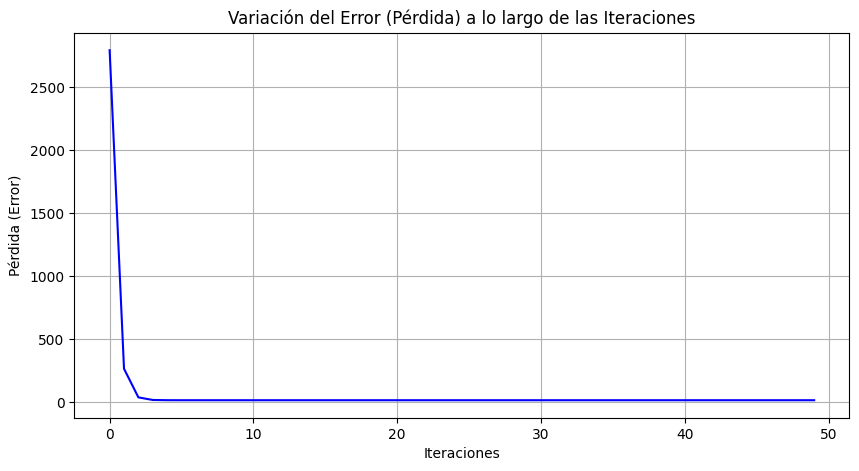

In [105]:
max_iters = 50
gamma = 0.7
w_initial = np.array([0, 0])

# # Iniciamos
# start_time = datetime.datetime.now()
# gd_l, gd_w = gd_algorithm(X_, y, w_initial, max_iters, gamma)
# end_time = datetime.datetime.now()

# # Vamos los resultados
# ex_time = (end_time - start_time).total_seconds()A
# print(f"Tiempo de ejecucion del Algortimo GD: {ex_time:.3f} segundos")

def timpo_ejecucion_gd(X_, y, w_initial, max_iters, gamma):
    # Iniciamos
    start_time = datetime.datetime.now()
    gd_l, gd_w = gd_algorithm(X_, y, w_initial, max_iters, gamma)
    end_time = datetime.datetime.now()

    # Tiempo de ejecución
    ex_time = (end_time - start_time).total_seconds()
    print(f"Tiempo de ejecución del Algoritmo GD: {ex_time:.3f} segundos")

    # Graficar la variación del error
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(gd_l)), gd_l, color='blue')
    plt.title('Variación del Error (Pérdida) a lo largo de las Iteraciones')
    plt.xlabel('Iteraciones')
    plt.ylabel('Pérdida (Error)')
    plt.grid()
    plt.show()
  

timpo_ejecucion_gd(X_, y, w_initial, max_iters, gamma)


D) Ahora experimentemos con el valor del tamaño del paso y los parámetros de inicialización para ver cómo influyen en la convergencia. En teoría, el descenso de gradiente converge al optimo en funciones convexas, cuando el valor del tamaño del paso se elige apropiadamente.
- Prueba los siguientes valores del tamaño del paso: 0.001, 0.01, 0.5, 1, 2, 2.5. 

¿Qué observas? ¿Convergió el procedimiento?

$\textbf{Respuestas: }$

- Al variar el tamaño del paso se nota significativamente tanto en la velocidad de convergencia como en la precisión del modelo. 
- En los dos primeros valores 0.001 y 0.01 se nota una baja velocidad de convergencia, y si aumentamos el número de iteraciones requeriría un alto costo computacional.
- Entre 0.5 y 1 en este rango de valores se puede observar que con esos parámetros y ese número de iteraciones se podría llegar a una buena estimación el modelo puede converger a una solución. 
- Entre 2 y 2.5 el paso es demasiado alto el modelo pierde precisión y no logra descender hasta el punto mínimo, lo que quiere decir que la función de pérdida aumenta en cada iteración. 


 GD iter 0/49: loss=2792.2367127591674, w0=0.07329392200210519, w1=0.013479712434988977
 GD iter 1/49: loss=2786.685787960211, w0=0.14651455008220826, w1=0.026945945157542953
 GD iter 2/49: loss=2781.1459594599287, w0=0.21966195753423123, w1=0.04039871164737437
 GD iter 3/49: loss=2775.617205076818, w0=0.2927362175788022, w1=0.05383802537071596
 GD iter 4/49: loss=2770.099502673719, w0=0.36573740336332855, w1=0.06726389978033423
 GD iter 5/49: loss=2764.5928301577246, w0=0.4386655879620704, w1=0.08067634831554288
 GD iter 6/49: loss=2759.0971654800887, w0=0.5115208443762135, w1=0.09407538440221631
 GD iter 7/49: loss=2753.6124866361442, w0=0.5843032455339424, w1=0.10746102145280306
 GD iter 8/49: loss=2748.138771665208, w0=0.6570128642905136, w1=0.12083327286633921
 GD iter 9/49: loss=2742.675998650499, w0=0.7296497734283283, w1=0.13419215202846185
 GD iter 10/49: loss=2737.2241457190466, w0=0.8022140456570052, w1=0.14753767231142234
 GD iter 11/49: loss=2731.783191041604, w0=0.8747057

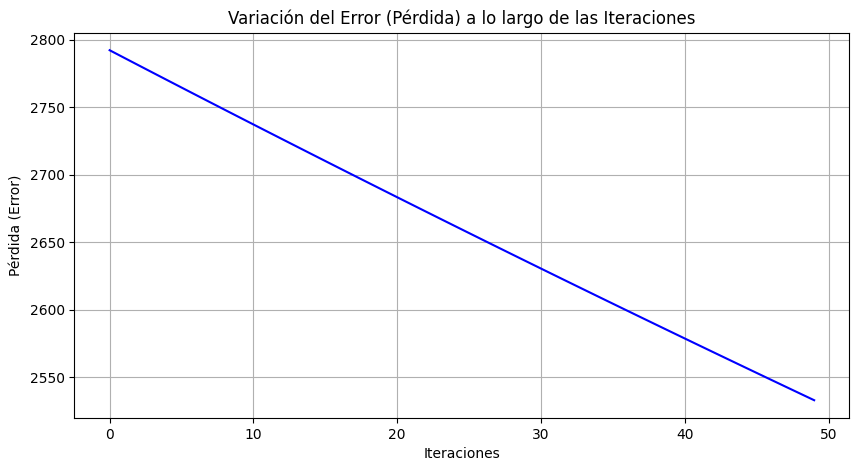

In [106]:
gamma = 0.001
max_iters = 50
w_initial = np.array([0, 0])
timpo_ejecucion_gd(X_, y, w_initial, max_iters, gamma)

 GD iter 0/49: loss=2792.2367127591674, w0=0.7329392200210519, w1=0.13479712434988975
 GD iter 1/49: loss=2736.9773813438496, w0=1.4585490478418932, w1=0.2682462774562805
 GD iter 2/49: loss=2682.8177106236967, w0=2.1769027773845258, w1=0.4003609390316074
 GD iter 3/49: loss=2629.735817350875, w0=2.888072969631732, w1=0.531154453991181
 GD iter 4/49: loss=2577.7102537541823, w0=3.5921314599564664, w1=0.6606400338011589
 GD iter 5/49: loss=2526.7199988730636, w0=4.289149365377954, w1=0.788830757813037
 GD iter 6/49: loss=2476.744450064079, w0=4.979197091745226, w1=0.9157395745847964
 GD iter 7/49: loss=2427.7634146763935, w0=5.662344340848826, w1=1.041379303188838
 GD iter 8/49: loss=2379.757101892924, w0=6.338660117461389, w1=1.1657626345068395
 GD iter 9/49: loss=2332.706114733844, w0=7.008212736307827, w1=1.288902132511661
 GD iter 10/49: loss=2286.59144221923, w0=7.6710698289658, w1=1.410810235536434
 GD iter 11/49: loss=2241.3944516876572, w0=8.327298350697195, w1=1.531499257530959

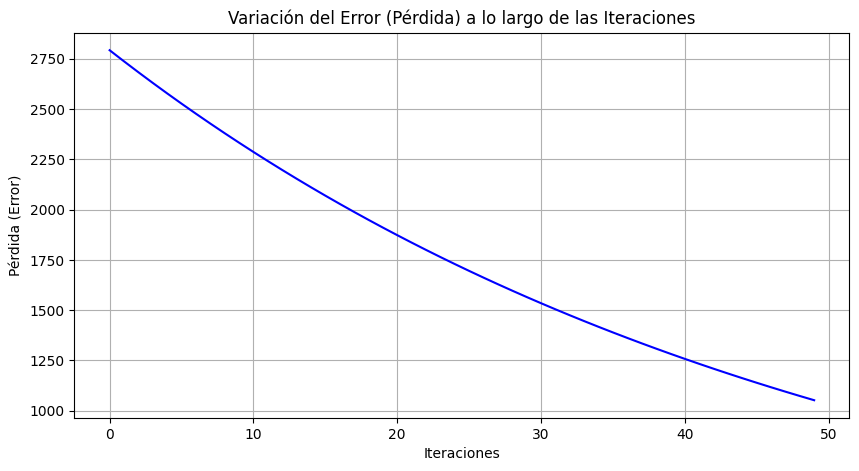

In [107]:
gamma = 0.01
timpo_ejecucion_gd(X_, y, w_initial, max_iters, gamma)

 GD iter 0/49: loss=2792.2367127591674, w0=36.646961001052595, w1=6.739856217494488
 GD iter 1/49: loss=709.598594091414, w0=54.97044150157889, w1=10.109784326241748
 GD iter 2/49: loss=188.9390644244757, w0=64.13218175184204, w1=11.794748380615388
 GD iter 3/49: loss=58.774182007740976, w0=68.71305187697361, w1=12.637230407802214
 GD iter 4/49: loss=26.23296140355733, w0=71.0034869395394, w1=13.058471421395629
 GD iter 5/49: loss=18.09765625251138, w0=72.1487044708223, w1=13.269091928192337
 GD iter 6/49: loss=16.0638299647499, w0=72.72131323646374, w1=13.374402181590693
 GD iter 7/49: loss=15.555373392809521, w0=73.00761761928446, w1=13.42705730828987
 GD iter 8/49: loss=15.428259249824436, w0=73.15076981069483, w1=13.453384871639459
 GD iter 9/49: loss=15.396480714078159, w0=73.22234590640001, w1=13.466548653314254
 GD iter 10/49: loss=15.38853608014159, w0=73.2581339542526, w1=13.473130544151651
 GD iter 11/49: loss=15.386549921657448, w0=73.27602797817889, w1=13.47642148957035
 GD

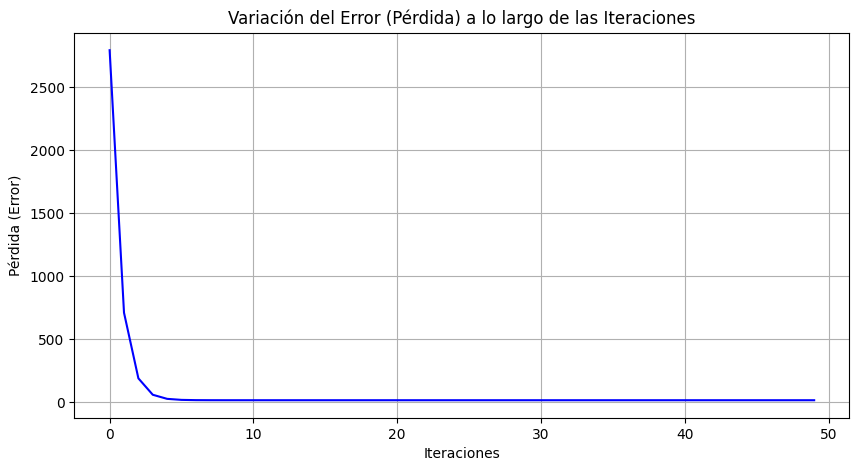

In [108]:
gamma = 0.5
timpo_ejecucion_gd(X_, y, w_initial, max_iters, gamma)

 GD iter 0/49: loss=2792.2367127591674, w0=73.29392200210519, w1=13.479712434988976
 GD iter 1/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
 GD iter 2/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
 GD iter 3/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
 GD iter 4/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
 GD iter 5/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
 GD iter 6/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
 GD iter 7/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
 GD iter 8/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
 GD iter 9/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
 GD iter 10/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
 GD iter 11/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712

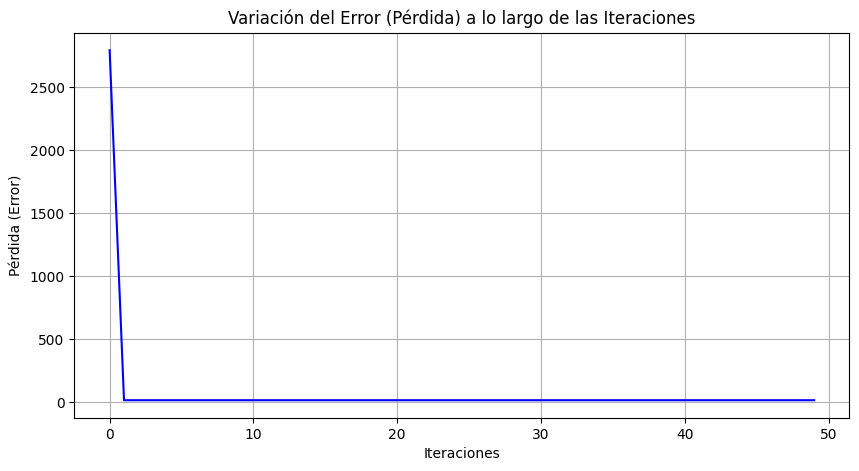

In [109]:
gamma = 1
timpo_ejecucion_gd(X_, y, w_initial, max_iters, gamma)


 GD iter 0/49: loss=2792.2367127591674, w0=146.58784400421038, w1=26.95942486997795
 GD iter 1/49: loss=2792.236712759165, w0=-2.842170943040401e-14, w1=3.197442310920451e-13
 GD iter 2/49: loss=2792.2367127591656, w0=146.58784400421044, w1=26.959424869977607
 GD iter 3/49: loss=2792.2367127591647, w0=-5.684341886080802e-14, w1=6.394884621840902e-13
 GD iter 4/49: loss=2792.2367127591624, w0=146.5878440042104, w1=26.959424869977287
 GD iter 5/49: loss=2792.2367127591583, w0=0.0, w1=9.663381206337363e-13
 GD iter 6/49: loss=2792.236712759154, w0=146.58784400421038, w1=26.959424869976964
 GD iter 7/49: loss=2792.2367127591524, w0=2.842170943040401e-14, w1=1.3038459201197838e-12
 GD iter 8/49: loss=2792.2367127591474, w0=146.58784400421035, w1=26.95942486997663
 GD iter 9/49: loss=2792.2367127591456, w0=5.684341886080802e-14, w1=1.6129320101754274e-12
 GD iter 10/49: loss=2792.236712759141, w0=146.58784400421033, w1=26.95942486997634
 GD iter 11/49: loss=2792.2367127591397, w0=8.526512829

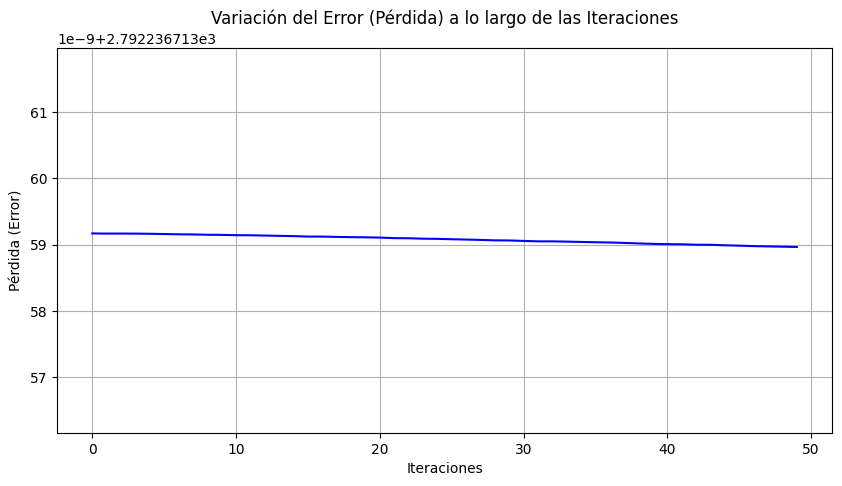

In [110]:
gamma = 2
timpo_ejecucion_gd(X_, y, w_initial, max_iters, gamma)


 GD iter 0/49: loss=2792.2367127591674, w0=183.23480500526298, w1=33.69928108747244
 GD iter 1/49: loss=6263.300243872087, w0=-91.61740250263145, w1=-16.84964054373576
 GD iter 2/49: loss=14073.193188876141, w0=320.6609087592101, w1=58.97374190307583
 GD iter 3/49: loss=31645.452315135255, w0=-297.75655813355206, w1=-54.761331767140405
 GD iter 4/49: loss=71183.03534921817, w0=629.8696422055909, w1=115.84127873818207
 GD iter 5/49: loss=160142.59717590467, w0=-761.5696583031229, w1=-140.06263701979887
 GD iter 6/49: loss=360301.6112859488, w0=1325.5892924599464, w1=243.79323661716862
 GD iter 7/49: loss=810659.3930335471, w0=-1805.149133684656, w1=-331.9905738382762
 GD iter 8/49: loss=1823964.4019656423, w0=2890.958505532245, w1=531.6851418448812
 GD iter 9/49: loss=4103900.6720628506, w0=-4153.202953293102, w1=-763.8284316798408
 GD iter 10/49: loss=9233757.279781561, w0=6413.039234944913, w1=1179.4419286072216
 GD iter 11/49: loss=20775934.647148643, w0=-9436.324047412105, w1=-1735.

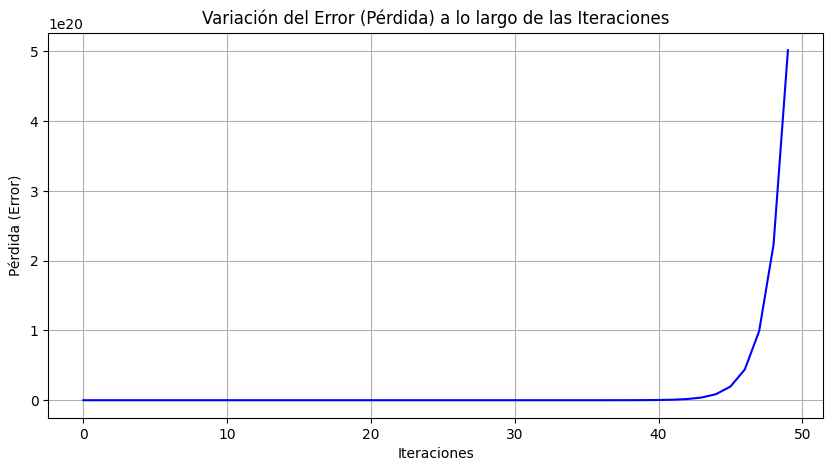

In [111]:
gamma = 2.5
w_initial = np.array([0, 0])
timpo_ejecucion_gd(X_, y, w_initial, max_iters, gamma)

- Prueba diferentes inicializaciones con un tamaño de paso fijo $\gamma$ = 0.1, por ejemplo:
    - w0 = 0, w1 = 0
    - w0 = 100, w1 = 10
    - w0 = −1000, w1 = 1000
    
    ¿Qué observas? ¿Convergió el procedimiento?

  $\textbf{Respuestas: }$  En el caso de que ambos pesos sean cero, la función va convergiendo a el
ejemplo visto cuando el gamma era 0.7, asimismo con w0=100, w1= 10 pero en
este caso falta más iteraciones para que converja, y para el caso de w0= -1000 ,
w1=1000 no alcanza a converger en un solo punto.


 GD iter 0/49: loss=2792.2367127591674, w0=7.32939220021052, w1=1.3479712434988977
 GD iter 1/49: loss=2264.635056030003, w0=13.925845180399987, w1=2.5611453626479053
 GD iter 2/49: loss=1837.27771407938, w0=19.862652862570506, w1=3.653002069882013
 GD iter 3/49: loss=1491.1182670993758, w0=25.205779776523975, w1=4.63567310639271
 GD iter 4/49: loss=1210.7291150455717, w0=30.014593999082095, w1=5.520077039252339
 GD iter 5/49: loss=983.6139018819908, w0=34.3425267993844, w1=6.316040578826006
 GD iter 6/49: loss=799.6505792194903, w0=38.237666319656476, w1=7.032407764442306
 GD iter 7/49: loss=650.640287862865, w0=41.74329188790135, w1=7.677138231496976
 GD iter 8/49: loss=529.9419518639982, w0=44.89835489932173, w1=8.25739565184618
 GD iter 9/49: loss=432.1762997049161, w0=47.737911609600076, w1=8.779627330160462
 GD iter 10/49: loss=352.9861214560597, w0=50.29351264885059, w1=9.249635840643318
 GD iter 11/49: loss=288.842077074486, w0=52.59355358417605, w1=9.672643500077887
 GD iter 1

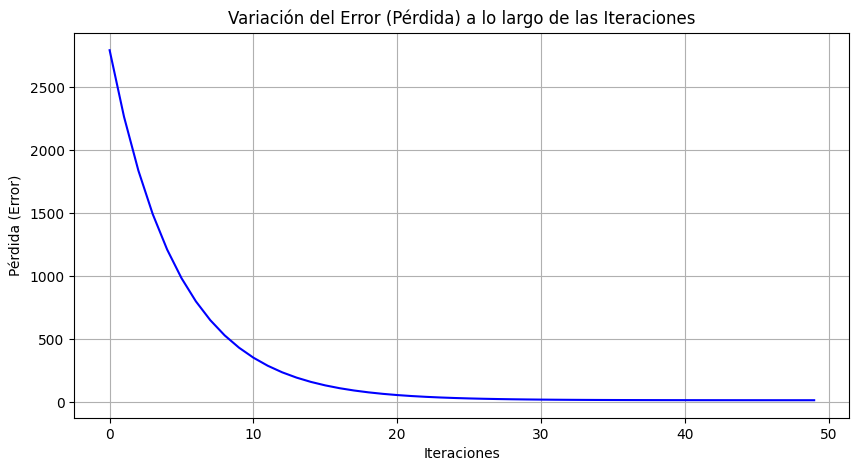

In [112]:
gamma = 0.1
max_iters = 50
w_initial = np.array([0, 0])
timpo_ejecucion_gd(X_, y, w_initial, max_iters, gamma)

 GD iter 0/49: loss=378.0473881987589, w0=97.32939220021052, w1=10.347971243498908
 GD iter 1/49: loss=309.1417031360723, w0=94.92584518039999, w1=10.661145362647925
 GD iter 2/49: loss=253.32809823529618, w0=92.7626528625705, w1=10.94300206988204
 GD iter 3/49: loss=208.1190782656674, w0=90.81577977652397, w1=11.196673106392742
 GD iter 4/49: loss=171.4997720902681, w0=89.06359399908209, w1=11.424977039252376
 GD iter 5/49: loss=141.8381340881947, w0=87.4866267993844, w1=11.630450578826045
 GD iter 6/49: loss=117.81220730651526, w0=86.06735631965647, w1=11.815376764442346
 GD iter 7/49: loss=98.35120661335486, w0=84.79001288790134, w1=11.981810331497018
 GD iter 8/49: loss=82.58779605189501, w0=83.64040379932173, w1=12.131600541846222
 GD iter 9/49: loss=69.81943349711263, w0=82.60575561960007, w1=12.266411731160506
 GD iter 10/49: loss=59.47705982773877, w0=81.67457225785058, w1=12.387741801543362
 GD iter 11/49: loss=51.09973715554598, w0=80.83650723227605, w1=12.496938864887932
 GD

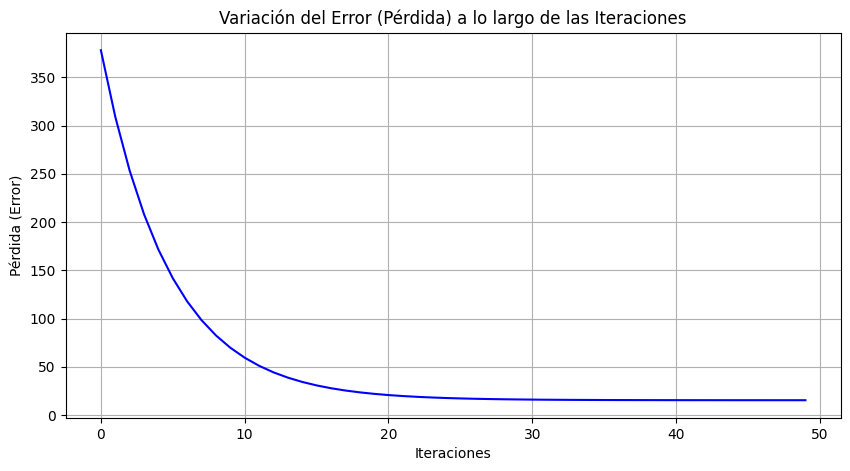

In [113]:
gamma = 0.1
w_initial = np.array([100, 10])
timpo_ejecucion_gd(X_, y, w_initial, max_iters, gamma)

 GD iter 0/49: loss=1062606.4462798769, w0=-892.6706077997894, w1=901.3479712434987
 GD iter 1/49: loss=860714.1448053948, w0=-796.0741548195998, w1=812.5611453626476
 GD iter 2/49: loss=697181.3806110647, w0=-709.1373471374293, w1=732.6530020698816
 GD iter 3/49: loss=564719.8416136574, w0=-630.8942202234757, w1=660.7356731063923
 GD iter 4/49: loss=457425.9950257574, w0=-560.4754060009175, w1=596.0100770392519
 GD iter 5/49: loss=370517.9792895585, w0=-497.0984732006151, w1=537.7570405788256
 GD iter 6/49: loss=300122.4865432374, w0=-440.059233680343, w1=485.32930776444186
 GD iter 7/49: loss=243102.1374187173, w0=-388.72391811209815, w1=438.1443482314965
 GD iter 8/49: loss=196915.654627856, w0=-342.52213410067776, w1=395.6778846518457
 GD iter 9/49: loss=159504.60356725843, w0=-300.9405284903994, w1=357.45806743016
 GD iter 10/49: loss=129201.65220817433, w0=-263.5170834411489, w1=323.06023193064283
 GD iter 11/49: loss=104656.26160731626, w0=-229.83598289682345, w1=292.10217998107

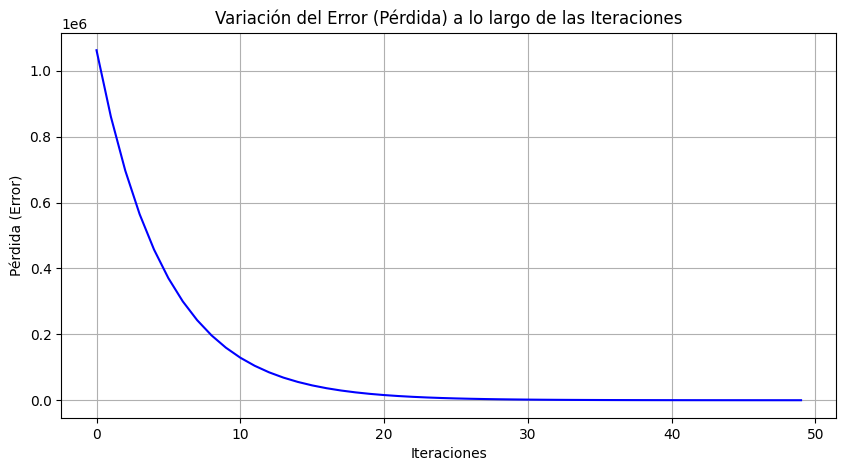

In [114]:
gamma = 0.1
w_initial = np.array([-1000, 1000])
timpo_ejecucion_gd(X_, y, w_initial, max_iters, gamma)

# 4. Stochastic Gradient Descent
Implementemos el descenso de gradiente estocástico. Recordemos de la clase que la regla de actualización para el descenso de gradiente estocástico en una función objetivo $L(w)= \frac{1}{N} \sum_{n=1}^{N}L_{n}(w) $ en el paso t es:  $$w^{(t+1)} = w^{t} - \gamma \bigtriangledown L_{n}(w^{t})$$

¿Que diferencias encuentras entre el procedimiento del gradiente descendente y el estocastico?

$\textbf{Respuestas: }$ En el estocástico solo toma cada valor y va actualizando los pesos en cada iteración, en cambio el gradiente descendente toma todos los valores, además, por su aleatoriedad el gradiente estocástico tiene la posibilidad de salir de mínimos locales donde el gradiente descendiente tendería a quedarse estancado, asumiendo ese valor como su mejor aproximación y superando al estocástico es recursos operacionales al trabajar con todos los valores. 


In [115]:
import numpy as np

def sgd_algorithm(X, y, w_initial, max_iters, gamma):
  
    w = w_initial
    losses = []

    for n_iter in range(max_iters):
        # Selección aleatoria de una muestra
        i = np.random.randint(0, X.shape[0])
        X_i = X[i:i+1]
        y_i = y[i:i+1]
        # Predicción y cálculo de pérdida
        loss = loss_function(X_i, y_i, w)
        losses.append(loss)  # Guardamos la pérdida de la iteración
        # Cálculo del gradiente
        gradient, er= gd(X_i, w, y_i)
        # Actualización de pesos
        w = w - gamma * gradient.flatten()
        print(" SGD iter {i}/{ti}: loss={l}, w0={w0}, w1={w1}".format( i=n_iter,ti=max_iters-1, l=loss, w0=w[0], w1=w[1]))

    return w, losses


In [116]:
max_iters = 50
gamma = 0.7
w_initial = np.array([0, 0])
wt, error = sgd_algorithm(X_, y, w_initial, max_iters, gamma)

 SGD iter 0/49: loss=2826.761767864356, w0=52.63294151486375, w1=-1.6743927332763777
 SGD iter 1/49: loss=336.791174496714, w0=70.80036706189104, w1=-7.870970976931571
 SGD iter 2/49: loss=467.4262325903196, w0=92.20311707067526, w1=25.789422979849693
 SGD iter 3/49: loss=371.40131919598986, w0=73.12503297367878, w1=6.764964173824687
 SGD iter 4/49: loss=32.18353924182951, w0=78.74106969515711, w1=15.253204293645913
 SGD iter 5/49: loss=13.073349009194212, w0=82.32043863800308, w1=16.963450813918495
 SGD iter 6/49: loss=2.0966135532864945, w0=80.88702268922172, w1=16.71648838821433
 SGD iter 7/49: loss=44.642579329316774, w0=74.27266499230734, w1=8.11817659515423
 SGD iter 8/49: loss=0.33026276848275976, w0=74.84157404752892, w1=8.39571581636395
 SGD iter 9/49: loss=43.716392826545494, w0=68.29618903440597, w1=15.671174614395293
 SGD iter 10/49: loss=6.5223579487459356, w0=70.82441188648428, w1=15.43074527903446
 SGD iter 11/49: loss=24.522439601966155, w0=65.92216843986448, w1=18.7514

# 5. Outliers

Simulemos la presencia de dos valores atípicos y su efecto en la regresión lineal bajo la
función de costo de error cuadrático medio (MSE). Para esto vuevle cargar los datos a través de
la función load_data() estableciendo {sub_sample=True} para mantener solo algunos ejemplos
de datos. Agrega dos outliers y encuentra el modelo.

- (a) ¿Se logra un buen ajuste?
    - $\textbf{Respuestas: }$ En este caso se probó con dos valores atípicos, que no siguen la naturaleza del resto de datos, y la respuesta del modelo se puede considerar aceptable, la línea de ajuste sigue la tendencia de los datos, por lo que el modelo podrá obtener aproximaciones razonables. 
    
- (b) ¿La función de perdida MSE es robusta ante outliers?
    - $\textbf{Respuestas: }$ El error cuadrático medio es una métrica de desempeño que tiene dificultad de sobrellevar los valores atípicos (outliers) debido a que penaliza con mayor los error muy grandes, aunque en esta prueba el modelo mostró robustez, es notorio el aumento del error, lo que da a entender que al considerar mayor cantidad de outliers el modelo podría sobre ajustarse a esos datos y no ser tan preciso. 

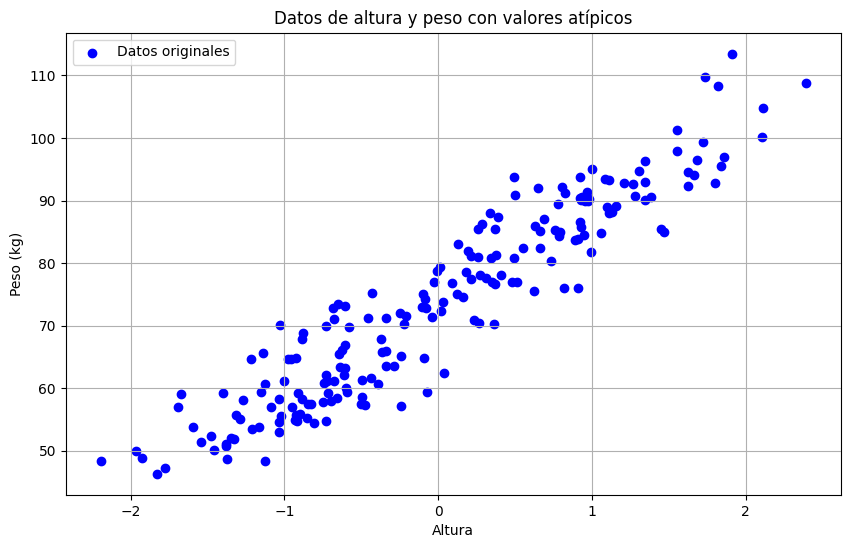

In [117]:
# Paso 1: Cargar y estandarizar los datos
height, weight, gender = load_data(sub_sample=True)
X, mu_X, sigma_X = standarizer(height)

# Paso 2: Construir los datos de entrada y salida
yp, X_p = build_model_data(X, weight)

# Paso 3: Agregar dos valores atípicos


# Graficar los datos
plt.figure(figsize=(10, 6))
plt.scatter(X_p[:-2, 1], yp[:-2], color='blue', label='Datos originales')
#plt.scatter(outlier_X, outlier_y, color='red', marker='x', s=100, label='Outliers')
plt.xlabel("Altura")
plt.ylabel("Peso (kg)")
plt.title("Datos de altura y peso con valores atípicos")
plt.legend()
plt.grid()
plt.show()

In [118]:
w_initial = np.array([0, 0])
max_iters = 50
gamma = 0.7
er, w_out= gd_algorithm(X_p, yp, w_initial, max_iters, gamma)

 GD iter 0/49: loss=2829.2722244384163, w0=51.54259072181183, w1=10.132993413506076
 GD iter 1/49: loss=267.05002587794155, w0=67.00536793835533, w1=13.172891437557823
 GD iter 2/49: loss=36.45002800750027, w0=71.64420110331838, w1=14.084860844773322
 GD iter 3/49: loss=15.696028199160635, w0=73.03585105280729, w1=14.358451666937965
 GD iter 4/49: loss=13.828168216410077, w0=73.45334603765397, w1=14.440528913587356
 GD iter 5/49: loss=13.660060817962522, w0=73.57859453310797, w1=14.46515208758217
 GD iter 6/49: loss=13.644931152102243, w0=73.61616908174418, w1=14.472539039780616
 GD iter 7/49: loss=13.643569482174817, w0=73.62744144633503, w1=14.474755125440149
 GD iter 8/49: loss=13.643446931881353, w0=73.63082315571229, w1=14.47541995113801
 GD iter 9/49: loss=13.643435902354941, w0=73.63183766852546, w1=14.475619398847368
 GD iter 10/49: loss=13.643434909697561, w0=73.63214202236942, w1=14.475679233160175
 GD iter 11/49: loss=13.643434820358397, w0=73.6322333285226, w1=14.4756971834

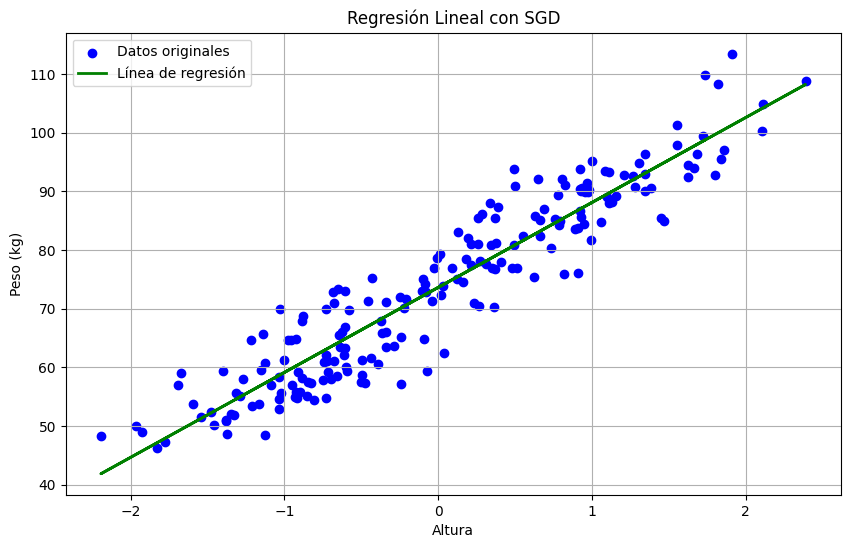

In [119]:
w0_out, w1_out = w_out
X_height = X_p[:, 1]
y_pred = w0_out + w1_out * X_height

plt.figure(figsize=(10, 6))
plt.scatter(X_p[:-2, 1], yp[:-2], color='blue', label='Datos originales')  # Datos originales
#plt.scatter(outlier_X, outlier_y, color='red', marker='x', s=100, label='Outliers')  # Outliers
plt.plot(X_height, y_pred, color='green', linewidth=2, label='Línea de regresión')  # Línea de regresión

plt.xlabel("Altura")
plt.ylabel("Peso (kg)")
plt.title("Regresión Lineal con SGD")
plt.legend()
plt.grid()
plt.show()

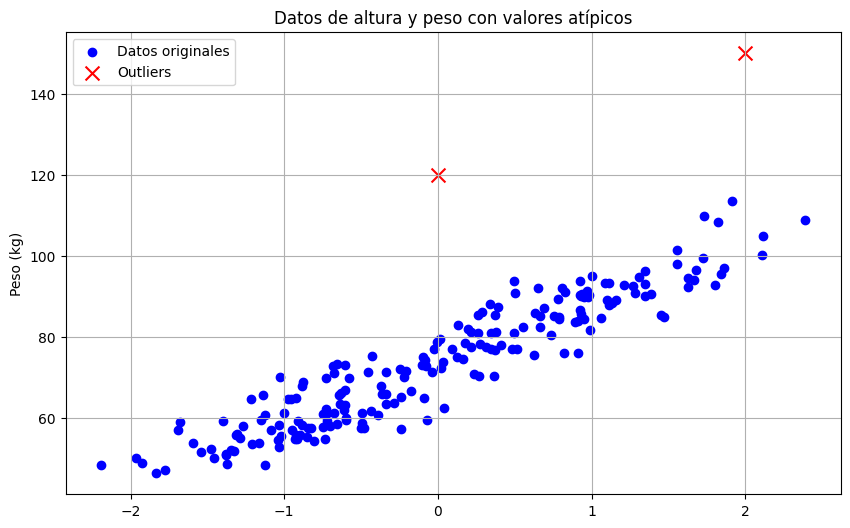

In [120]:
X_2 = np.append(X_p, [[1, 0], [1, 2.0]], axis=0)  # Nuevas muestras con valores extremos en altura estandarizada
y2 = np.append(yp, [120, 150])                      # Nuevas muestras con valores extremos en peso

# Separar los outliers de los datos originales
outlier_X = X_2[-2:, 1]
outlier_y = y2[-2:]
# Graficar los datos
plt.figure(figsize=(10, 6))
plt.scatter(X_2[:-2, 1], y2[:-2], color='blue', label='Datos originales')
plt.scatter(outlier_X, outlier_y, color='red', marker='x', s=100, label='Outliers')
# plt.xlabel("Altura")
plt.ylabel("Peso (kg)")
plt.title("Datos de altura y peso con valores atípicos")
plt.legend()
plt.grid()
plt.show()

In [127]:
w_initial = np.array([0, 0])
max_iters = 50
gamma = 0.7
err, w_out2= gd_algorithm(X_2, y2, w_initial, max_iters, gamma)

 GD iter 0/49: loss=2892.5962618202143, w0=51.96791160575428, w1=11.07227070644166
 GD iter 1/49: loss=277.3025688982756, w0=67.48154657763389, w1=13.957039763735104
 GD iter 2/49: loss=46.57744553986845, w0=72.11564362028585, w1=14.69495678963181
 GD iter 3/49: loss=26.167434110519864, w0=73.50075845666433, w1=14.879100116727704
 GD iter 4/49: loss=24.35713629214065, w0=73.91501666669701, w1=14.923467068178926
 GD iter 5/49: loss=24.19614816921841, w0=74.03898663598389, w1=14.933598563386186
 GD iter 6/49: loss=24.18179499829625, w0=74.07610740848634, w1=14.93570859585781
 GD iter 7/49: loss=24.18051213499614, w0=74.08722901624964, w1=14.936069708931159
 GD iter 8/49: loss=24.18039719916959, w0=74.09056299581475, w1=14.936098459639444
 GD iter 9/49: loss=24.180386877893987, w0=74.09156299042195, w1=14.936083778800532
 GD iter 10/49: loss=24.180385948988157, w0=74.09186309055251, w1=14.936072545641553
 GD iter 11/49: loss=24.18038586521101, w0=74.09195319844524, w1=14.93606717364554
 G

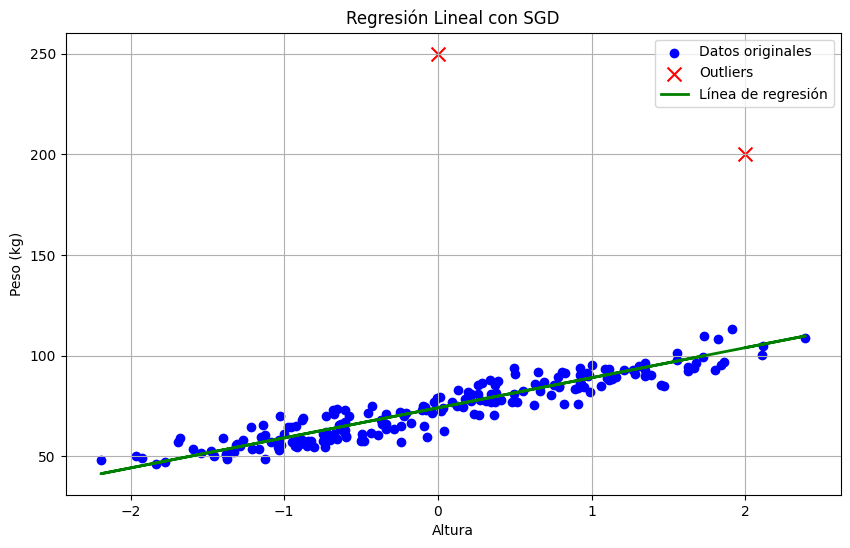

In [128]:
w0_out2, w1_out2 = w_out2
X_height = X_2[:, 1]
y_pred = w0_out2 + w1_out2 * X_height

plt.figure(figsize=(10, 6))
plt.scatter(X_2[:-2, 1], y2[:-2], color='blue', label='Datos originales')  # Datos originales
plt.scatter(outlier_X, outlier_y, color='red', marker='x', s=100, label='Outliers')  # Outliers
plt.plot(X_height, y_pred, color='green', linewidth=2, label='Línea de regresión')  # Línea de regresión

plt.xlabel("Altura")
plt.ylabel("Peso (kg)")
plt.title("Regresión Lineal con SGD")
plt.legend()
plt.grid()
plt.show()

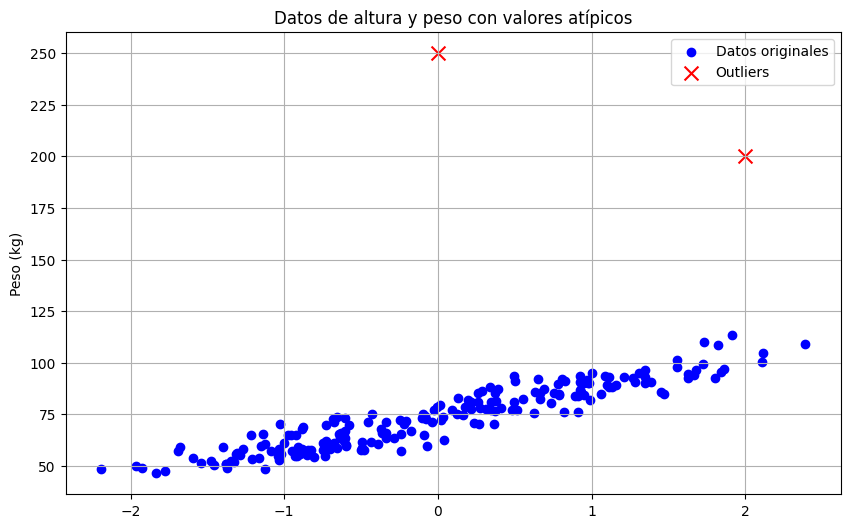

In [129]:
X_3 = np.append(X_p, [[1, 0], [1, 2.0]], axis=0)  # Nuevas muestras con valores extremos en altura estandarizada
y3 = np.append(yp, [250, 200])                      # Nuevas muestras con valores extremos en peso

# Separar los outliers de los datos originales
outlier_X = X_3[-2:, 1]
outlier_y = y3[-2:]
# Graficar los datos
plt.figure(figsize=(10, 6))
plt.scatter(X_3[:-2, 1], y3[:-2], color='blue', label='Datos originales')
plt.scatter(outlier_X, outlier_y, color='red', marker='x', s=100, label='Outliers')
# plt.xlabel("Altura")
plt.ylabel("Peso (kg)")
plt.title("Datos de altura y peso con valores atípicos")
plt.legend()
plt.grid()
plt.show()

In [130]:
w_initial = np.array([0, 0])
max_iters = 50
gamma = 0.7
err, w_out3= gd_algorithm(X_3, y3, w_initial, max_iters, gamma)

 GD iter 0/49: loss=3054.9724994439766, w0=52.5916739819919, w1=11.418805359907008
 GD iter 1/49: loss=372.1672475417468, w0=68.29003594142176, w1=14.40080998234112
 GD iter 2/49: loss=135.58176311750123, w0=72.97887717048137, w1=15.16594348187029
 GD iter 3/49: loss=114.66171072284521, w0=74.38022663375698, w1=15.357683706877427
 GD iter 4/49: loss=112.80690448458368, w0=74.7993025800911, w1=15.4041645587182
 GD iter 5/49: loss=112.64202186007661, w0=74.92470321947361, w1=15.414882182995953
 GD iter 6/49: loss=112.6273269897878, w0=74.96224913072408, w1=15.417154076372722
 GD iter 7/49: loss=112.62601406415695, w0=74.97349715830353, w1=15.417559679403187
 GD iter 8/49: loss=112.62589647626362, w0=74.97686875546725, w1=15.417600592575427
 GD iter 9/49: loss=112.62588592039215, w0=74.97787995105973, w1=15.417589215465364
 GD iter 10/49: loss=112.6258849706791, w0=74.97818338858873, w1=15.41757887289732
 GD iter 11/49: loss=112.62588488505162, w0=74.9782744915286, w1=15.417573738775692
 

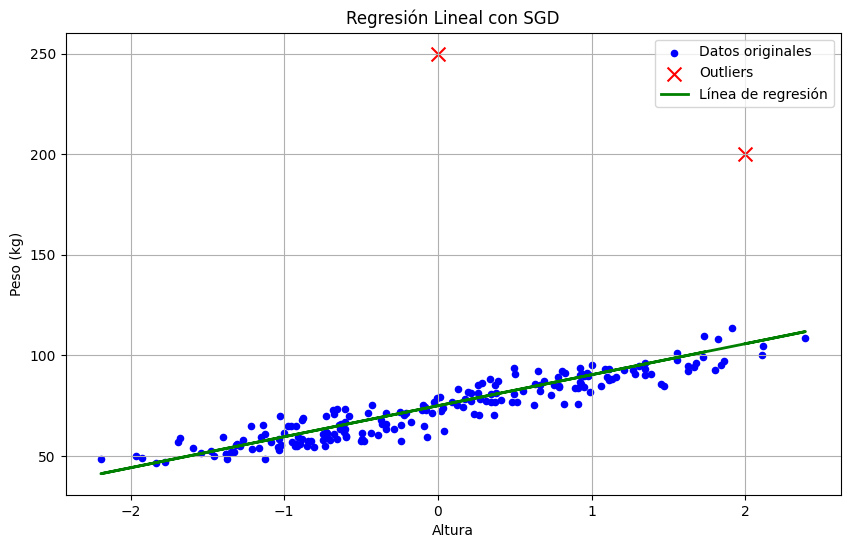

In [132]:
w0_out3, w1_out3 = w_out3
X_height = X_3[:, 1]
y_pred = w0_out3 + w1_out3 * X_height

plt.figure(figsize=(10, 6))
plt.scatter(X_3[:-2, 1], y3[:-2], color='blue', s=20,label='Datos originales')  # Datos originales
plt.scatter(outlier_X, outlier_y, color='red', marker='x', s=100, label='Outliers')  # Outliers
plt.plot(X_height, y_pred, color='green', linewidth=2, label='Línea de regresión')  # Línea de regresión

plt.xlabel("Altura")
plt.ylabel("Peso (kg)")
plt.title("Regresión Lineal con SGD")
plt.legend()
plt.grid()
plt.show()